<a href="https://colab.research.google.com/github/jh6695/study/blob/main/%EC%9E%90%EC%97%B0%EC%96%B4_2_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EC%A0%84%EC%B2%98%EB%A6%AC(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#한국어 전처리 패키지

#1. PyKoSpacing

띄어쓰기가 되어 있지 않은 문장을 띄어쓰기 형태로 바꿔 주는 패키지

In [34]:
pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-kgxkw01y
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-kgxkw01y
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit 04aeebcbe26b109486a642e57dc58665c4818cf3
  Preparing metadata (setup.py) ... done
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [35]:
sent = '김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.'

In [36]:
new_sent = sent.replace(" ", '')
print(new_sent)

김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는결전의날을앞두고10년간함께훈련한사형인유연재(김광수분)를찾으러속세로내려온인물이다.


In [37]:
from pykospacing import Spacing
spacing = Spacing()

spacing_sent = spacing(new_sent)
print(sent)
print(spacing_sent) #원 문장과 비교. 정확하게 일치함.

김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


# 2. ph-hanspell

네이버 한글 맞춤법 검사 패키지 (현재 작동하지 않음 24.03.03)

In [38]:
pip install git+https://github.com/ssut/py-hanspell.git

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-5rc76w6g
  Running command git clone --filter=blob:none --quiet https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-5rc76w6g
  Resolved https://github.com/ssut/py-hanspell.git to commit fdc6ca50c19f1c85971437a072d89d4e5ce024b8
  Preparing metadata (setup.py) ... done


In [39]:
from hanspell import spell_checker

sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

KeyError: 'result'

In [40]:
#띄어쓰기도 보정
spelled_sent = spell_checker.check(new_sent)
hanspell_sent = spelled_sent.checked

print(hanspell_sent)
print(kospacing_sent) #앞에 사용한 kospacing 패키지에서 얻은 결과

KeyError: 'result'

# 3. soynlp를 이용한 단어 토큰화

- 품사 태깅, 단어 토큰화를 지원하는 단어 토크나이저
- 비지도학습
- 데이터에 자주 등장하는 단어들을 단어로 분석
- 내부 단어 점수 표로 동작
- 응집 확률, 브랜칭 엔트로피

In [41]:
!pip install soynlp

#1) 신조어 문제

In [42]:
#okt와 비교
#okt는 분석기에 등록되지 않은 단어는 인식 못함
from konlpy.tag import Okt

okt = Okt()
print(okt.morphs('에이비식스 이대휘 1월 최애돌 기부 요정'))

['에이', '비식스', '이대', '휘', '1월', '최애', '돌', '기부', '요정']


soynlp는 단어가 자주 등장하거나 앞뒤로 조사나 완전히 다른 단어가 등장하면 형태소라고 판단함

ex) 최고, 가수, 실력 + 에이비식스

#2) 학습하기


In [43]:
import urllib.request
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

In [45]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt", filename="2016-10-20.txt")

('2016-10-20.txt', <http.client.HTTPMessage at 0x7fac82fe1720>)

In [47]:
#훈련 데이터를 다수의 문서로 분리
corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus)

30091

In [49]:
#상위 3개 문서 추출
i = 0
for doc in corpus:
  if len(doc) > 0: #문서가 비어있지 않은지 확인
    print(doc)
    i = i + 1
    if i == 3:
      break


19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

soynlp는 다른 형태소 분석기들과 다르게 학습 과정을 거쳐야 함.

전체 코퍼스로부터 응집 확률과 브렌칭 엔트로피 단어 점수표를 만드는 과정.

WordEtractor.extract()

In [50]:
word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 1.488 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


# 3) soynlp의 응집 확률

응집 확률이란 내부 문자열이 얼마나 응집하여 자주 등장하는지를 뜻함.

문자열을 문자 단위로 분리해 내부 문자열을 만드는 과정에서 왼쪽부터 문자열을 하나씩 추가하면서 다음 문자가 나올 확률을 계산해 누적곱한 값.

값이 높을수록 이 문자열 시퀀스는 하나의 단어로 등장할 확률이 높음.


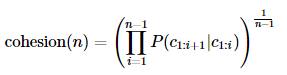

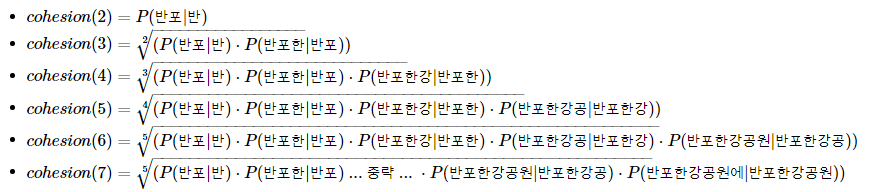

In [52]:
#"반포한"의 응집확률
word_score_table["반포한"].cohesion_forward

0.08838002913645132

In [53]:
#"반포한강"의 응집확률
word_score_table["반포한강"].cohesion_forward

0.19841268168224552

In [54]:
word_score_table["반포한강공"].cohesion_forward

0.2972877884078849

In [55]:
word_score_table["반포한강공원"].cohesion_forward

0.37891487632839754

In [56]:
word_score_table["반포한강공원에"].cohesion_forward

0.33492963377557666

"반포한강공원"까지 응집 확률이 올라가다가 "반포한강공원에"에서 떨어짐.

"반포한강공원"이 한 단어임을 판단 가능.

# 4) sotnlp의 브랜칭 엔트로피

주어진 문자열에서 다음 문자열이 등장할지 판단하는 척도.

다음 문자를 판단하는 데 헷갈리는 척도.

완성된 단어와 가까워질수록 값이 줄어든다.

In [57]:
word_score_table["디스"].right_branching_entropy

1.6371694761537934

In [58]:
word_score_table["디스플"].right_branching_entropy

-0.0

In [59]:
word_score_table["디스플레"].right_branching_entropy

-0.0

In [60]:
word_score_table["디스플레이"].right_branching_entropy

3.1400392861792916

"디스플" 이후 어떤 단어가 들어갈지 명백하기 때문에 0값으로 줄어들음.

"디스플레이" 이후에는 조사나 다른 단어가 등장할 다양한 경우가 있기 때문에 값이 커짐.

#5) soynlp의 L tokenizer

L 토큰 + R 토큰 형식의 한국어

공부 + 하는

공원 + 에

L + R로 나누되 분리 기준을 점수가 가장 높은 L 토큰을 찾아내는 원리

In [67]:
from soynlp.tokenizer import LTokenizer
scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
l_tokenizer = LTokenizer(scores=scores)
l_tokenizer.tokenize("국제사회와 우리의 노력들로 범죄를 척결하자", flatten=False)

[('국제사회', '와'), ('우리', '의'), ('노력', '들로'), ('범죄', '를'), ('척결', '하자')]

#6) 최대 점수 토크나이저

띄어쓰기가 되지 않은 문장에서 점수가 높은 글자 시퀀스를 순차적을 찾아내는 토크나이저

In [69]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("국제사회와우리의노력들로범죄를척결하자")

['국제사회', '와', '우리', '의', '노력', '들로', '범죄', '를', '척결', '하자']

#4. soynlp를 이용한 반복되는 문자 정제

ㅋㅋㅋ와 같은 문자를 하나로 정규화함

In [70]:
from soynlp.normalizer import *

In [75]:
print(emoticon_normalize('앜ㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠ', num_repeats=2)) #num_repeats: 몇번 이상 반복되면 축약할 것인지
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ', num_repeats=2))

아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ


In [78]:
print(emoticon_normalize('와하하하하', num_repeats=2))
print(emoticon_normalize('와하하하하하하하', num_repeats=2))
print(emoticon_normalize('와하하하하하하하하하하', num_repeats=2))

와하하
와하하
와하하


#5. Customize konlpy

사용자 사전 추가

In [80]:
!pip install customized_konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.5/881.5 kB 6.6 MB/s eta 0:00:00


In [88]:
#형태소 분석기 Twitter 사용
from konlpy.tag import Twitter
twitter = Twitter()
twitter.morphs("은경이는 사무실로 갔습니다")

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['은경', '이', '는', '사무실', '로', '갔습니다']

In [90]:
twitter.add_dictionary('은경이', 'Noun')
#twitter 최신 버전에서 지원하지 않는듯 + 은경이 제대로 인식

AttributeError: 'Okt' object has no attribute 'add_dictionary'